# Practice 6 - HKMA Interbank Interest Rate Daily Rates API

Hong Kong Monetary Authority provides a web-based API to get daily interbank interest rates according to this documentation:
https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily/

Let's practice using an API by getting the HIBOR rates from here!

In [ ]:
import requests
import json
import io
import pandas as pd

## Q1 - Use `requests.get()` with the URL to receive a `response`


Expected:
*  "Status code is 200"

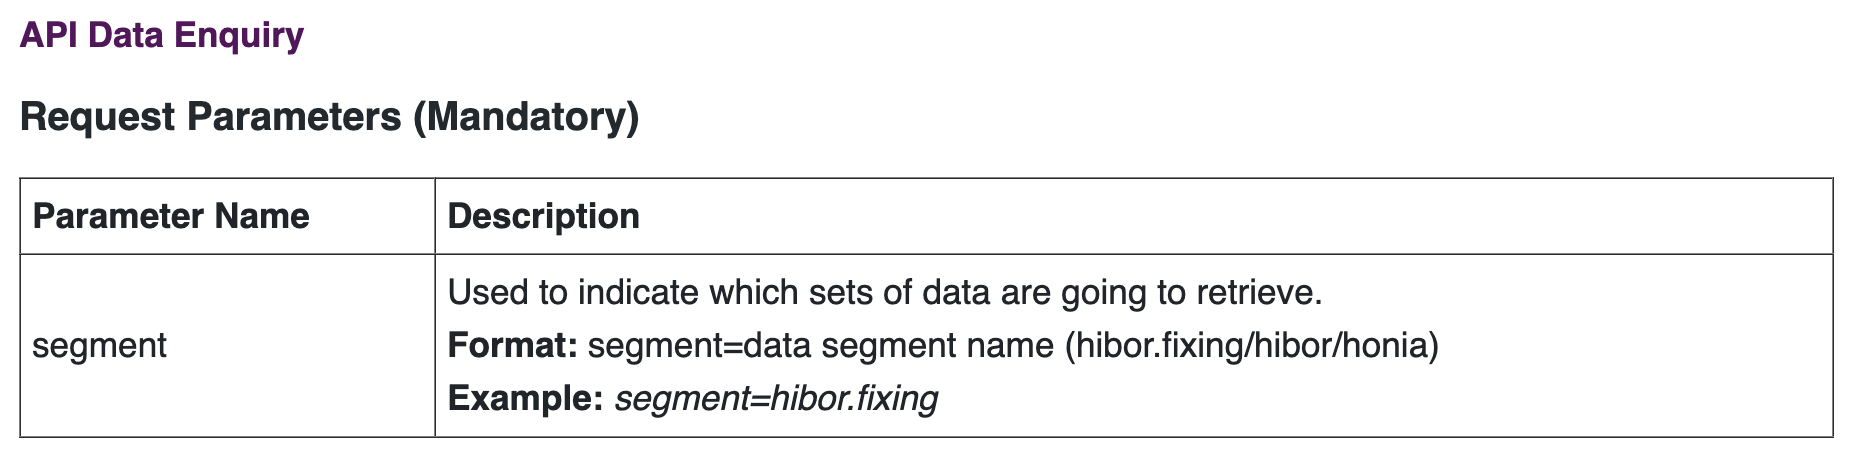

In [ ]:
API_URL = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/hk-interbank-ir-daily'
request_url = API_URL + '?segment=hibor.fixing'
response = None

# TODO: your code here


# Output
print(f'Status code is {response.status_code if hasattr(response, "status_code") else None}')

Status code is 200


## Q2 - The data retrieved is a JSON string, use `json.loads()` to import it as an object to see what data type it belongs to?

Expected:
*  "Data type of the imported JSON is <class 'dict'>"

In [ ]:
json_data = None

# TODO: your code here
json_data = json.loads(response.content)

# Output
print(f'Data type of the imported JSON is {type(json_data)}')

Data type of the imported JSON is <class 'dict'>


# Q3 - Since `json_data` is a `dict`, what are the `keys`? and what are the types of its `values`?

Expected:
* "The keys are: ['header', 'result']"
* "The types of the values are: [<class 'dict'>, <class 'dict'>]"

In [ ]:
json_data_keys = list()
json_data_value_types = list()

# TODO: your code here


# Output
print(f'The keys are: {json_data_keys}')
print(f'The types of the values are: {json_data_value_types}')

The keys are: ['header', 'result']
The types of the values are: [<class 'dict'>, <class 'dict'>]


# Q4 - We got some more dictionaries! Let's check their keys and see how they compare to the API specification below

Expected:
* json_data["header"] has these keys: ['success', 'err_code', 'err_msg']
* json_data["result"] has these keys: ['datasize', 'records']

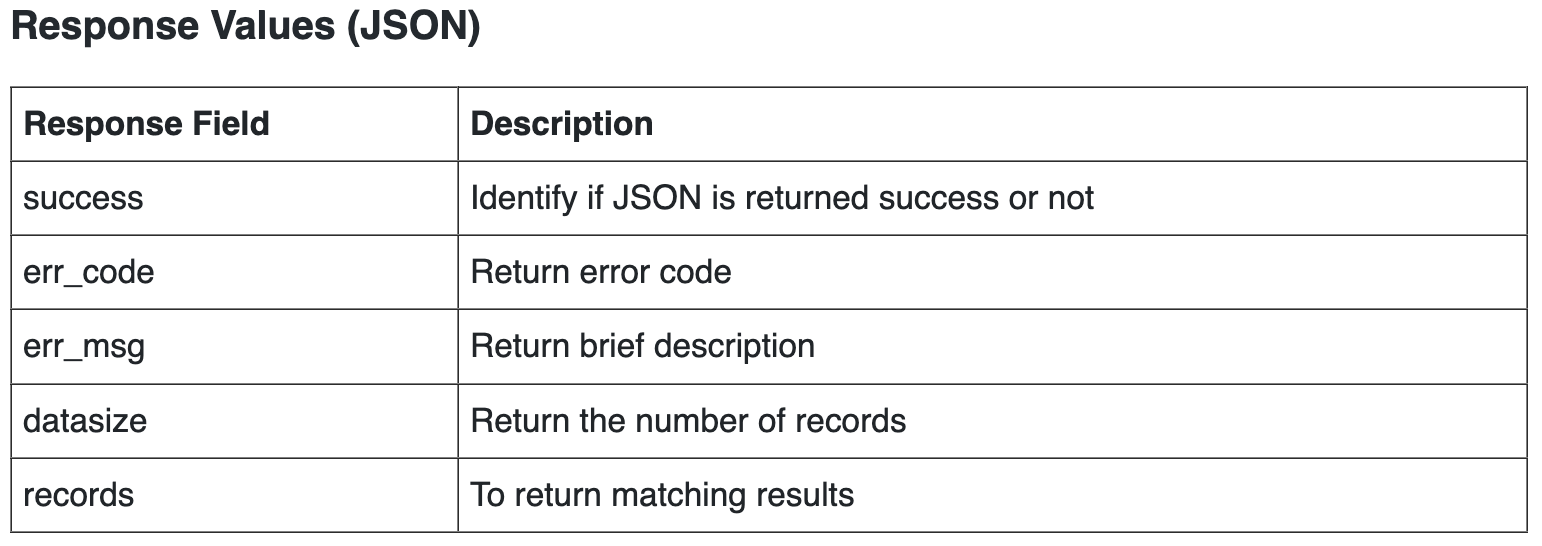

In [ ]:
header_keys = list()
result_keys = list()

# TODO: your code here


# Output
print(f'json_data["header"] has these keys: {header_keys}')
print(f'json_data["result"] has these keys: {result_keys}')

json_data["header"] has these keys: ['success', 'err_code', 'err_msg']
json_data["result"] has these keys: ['datasize', 'records']


## Q5 - Our target is the "records" field, store it as a variable called `records`
* Where within `json_data` is the "records" field located?


Expected:
*  "records" has the type of <class 'list'> with 100 elements

In [ ]:
records = list()

# TODO: your code here


# Output
print(f'"records" has the type of {type(records)} with {len(records)} elements')

"records" has the type of <class 'list'> with 100 elements


## Q6 - A list of dictionary with consistent schema is a good candidate to be processed using `pd.DataFrame()`, let's give it a try!

Hint:
* Remember to use `pd.to_datetime()` to convert the `end_of_day` column from string to date!


**Expected result**

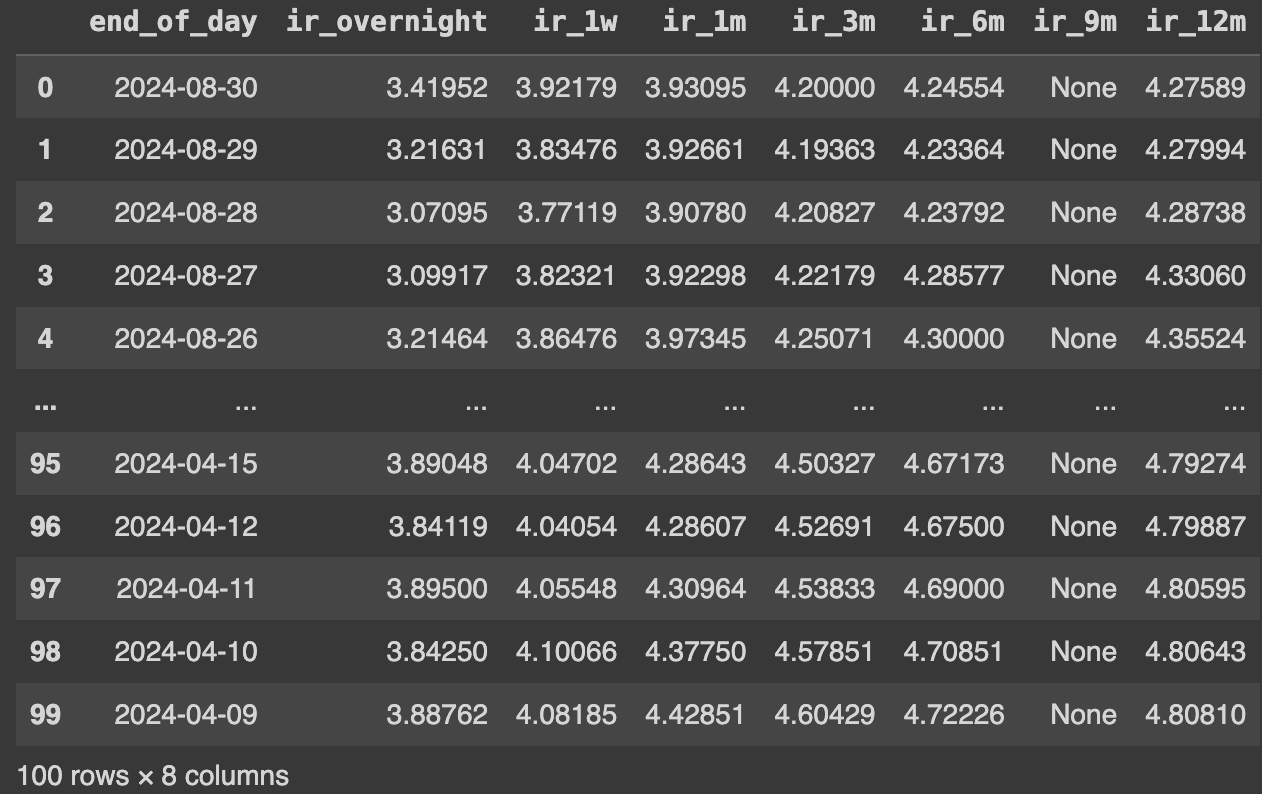

In [ ]:
df = None

# TODO: your code here

# Output
df

,end_of_day,ir_overnight,ir_1w,ir_1m,ir_3m,ir_6m,ir_9m,ir_12m
0,2024-08-30,3.41952,3.92179,3.93095,4.20000,4.24554,None,4.27589
1,2024-08-29,3.21631,3.83476,3.92661,4.19363,4.23364,None,4.27994
2,2024-08-28,3.07095,3.77119,3.90780,4.20827,4.23792,None,4.28738
3,2024-08-27,3.09917,3.82321,3.92298,4.22179,4.28577,None,4.33060
4,2024-08-26,3.21464,3.86476,3.97345,4.25071,4.30000,None,4.35524
...,...,...,...,...,...,...,...,...
95,2024-04-15,3.89048,4.04702,4.28643,4.50327,4.67173,None,4.79274
96,2024-04-12,3.84119,4.04054,4.28607,4.52691,4.67500,None,4.79887
97,2024-04-11,3.89500,4.05548,4.30964,4.53833,4.69000,None,4.80595
98,2024-04-10,3.84250,4.10066,4.37750,4.57851,4.70851,None,4.80643


# Q7 - Gather some statistics on HIBOR 1M rates (`ir_1m` column)

It turns out `df.describe()` summarize common statistics in a dataframe, and the result itself is a dataframe with the statistics as the indices


In [ ]:
df.describe()

,end_of_day,ir_overnight,ir_1w,ir_1m,ir_3m,ir_6m,ir_12m
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2024-06-20 12:43:12,3.966140,4.156334,4.360651,4.582879,4.672710,4.794897
min,2024-04-09 00:00:00,2.660360,3.283330,3.907800,4.193630,4.233640,4.275890
25%,2024-05-15 12:00:00,3.669048,3.858693,4.157338,4.484585,4.668485,4.789433
50%,2024-06-20 12:00:00,3.900000,4.060120,4.439020,4.617205,4.713215,4.849670
75%,2024-07-26 18:00:00,4.414973,4.449092,4.531800,4.729347,4.810417,4.973008
max,2024-08-30 00:00:00,5.253810,5.089760,4.708390,4.805830,4.854640,4.993330
std,NaN,0.512451,0.366748,0.229082,0.174713,0.180882,0.214987


Let's focus onto `min` and `max` of the `ir_1m` (HIBOR 1M) column

Hint
*  Use `.loc[]` to slice the required rows and columns
*  Use `.reset_index()` if you prefer numeric index

Expected

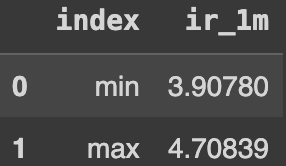

In [ ]:
df_1m_stats = None

# TODO: your code here

# Output
df_1m_stats

,index,ir_1m
0,min,3.90780
1,max,4.70839


# Q8 - Can you find the dates (`end_of_day`) corresponding to the `min`, `50%` and `max` of `ir_1m`?

Hint
*  Look up the entries with the same `ir_1m` values between `df_1m_stats` and `df`
*  Essentially we just need to perform a `merge()` operation

**Expected**

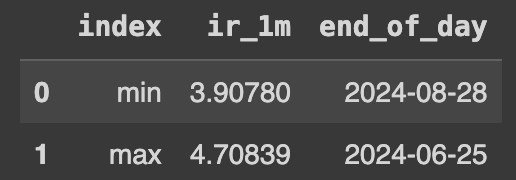

In [ ]:
df_1m_stats_with_dates = None

# TODO: your code here


# Output
df_1m_stats_with_dates

,index,ir_1m,end_of_day
0,min,3.90780,2024-08-28
1,max,4.70839,2024-06-25


## Extra - Actually we can use a library called `matplotlib` to visualize the rates, we may talk more about it when we have time next lecture


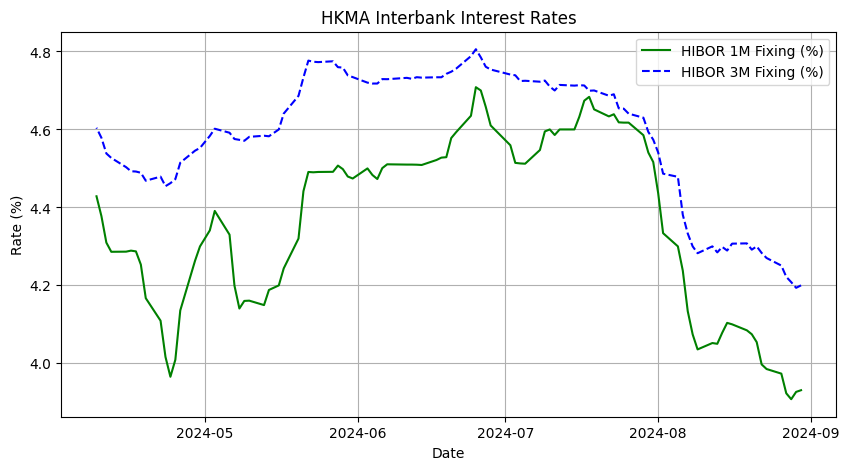

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5), dpi=100)

# Plot
plt.title(f'HKMA Interbank Interest Rates')
plt.plot(df['end_of_day'], df['ir_1m'], '-g', label='HIBOR 1M Fixing (%)')
plt.plot(df['end_of_day'], df['ir_3m'], '--b', label='HIBOR 3M Fixing (%)')

# Formatting
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend(loc='best')
plt.grid()
plt.show()